MSE for a linear function
$$y=m*x+b$$
$$Error = \frac{1}{N}\sum_{i=0}^{n}(y_{i} - \hat{y}_{i})^{2}$$
$$\hat{y}_{i} = m*x_{i} + b$$

Goal: Find the line resulting in the minimum of the error.

Gradient of the error function provides the direction of steepest ascent.
$$\nabla J = \begin{bmatrix}
   \frac{\partial J}{\partial m}\\\\
   \frac{\partial J}{\partial b}
\end{bmatrix}$$

$$\frac{\partial J}{\partial m}=\frac{1}{N}\sum_{i=0}^{n}2*(y_i-\hat{y_i})*-x_i = -\frac{2}{N}\sum_{i=0}^{n}x_i(y_i-\hat{y_i})$$

$$\frac{\partial J}{\partial b}=\frac{1}{N}\sum_{i=0}^{n}2*(y_i-\hat{y_i})*-1 = -\frac{2}{N}\sum_{i=0}^{n}(y_i-\hat{y_i})$$

Gradient descent: Move a small step ($\alpha$) in the opposite direction of the gradient to minimize the error function.

$$m = m - \alpha \frac{\partial J}{\partial m}$$
$$b = b - \alpha \frac{\partial J}{\partial b}$$



In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
data = pd.read_csv('dataset.csv')
data.head()

,studytime,finalscore
0,1.5,60
1,2.0,65
2,2.5,70
3,3.0,75
4,3.5,78


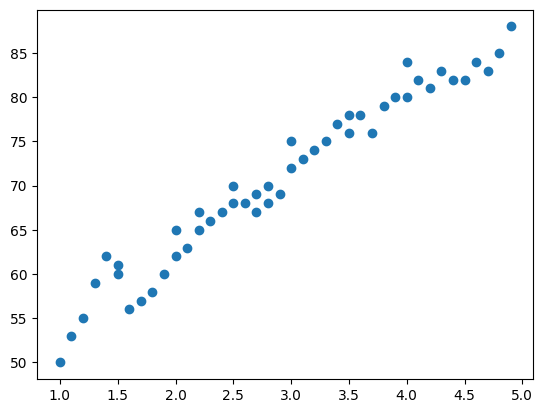

In [101]:
plt.scatter(data.studytime, data.finalscore)
plt.show()

In [102]:
X = data.studytime.to_numpy()
X = np.reshape(X, (X.size, 1))
ones = np.ones((X.size,1))
X = np.hstack((ones, X))

w = np.array([[1], [1]])

y = data.finalscore.to_numpy()
y = np.reshape(y, (y.size, 1))

In [103]:
iterations = 0
alpha = 0.01
while(iterations < 10000):
    y_hat = X @ w
    g_Jw = (1 / y.size) * X.T @ (X @ w - y)
    w = w - alpha * g_Jw
    iterations += 1
print(w)

[[45.65204236]
 [ 8.61496081]]


In [104]:
w_best = np.linalg.pinv(X).dot(y)
print(w_best)

[[45.65249089]
 [ 8.61482382]]


In [105]:
y_hat = X @ w
y_m = np.mean(y)

RSS = np.sum((y - y_hat) ** 2)
TSS = np.sum((y - y_m) ** 2)
R_sqrd = 1 - RSS/TSS

print("R^2 = {0:7.2f}".format(R_sqrd))

R^2 =    0.96


In [106]:
y_hat = X @ w_best
y_m = np.mean(y)

RSS = np.sum((y - y_hat) ** 2)
TSS = np.sum((y - y_m) ** 2)
R_sqrd = 1 - RSS/TSS

print("R^2 = {0:7.2f}".format(R_sqrd))

R^2 =    0.96
